In [1]:
import numpy as np 
import pandas as pd
df=pd.read_csv('Digit_recognizer.csv')
df.head()

# here we have information about pictures that are hand written and can be any number between 0-9.
# these pictures are of size 28 * 28 and are arranged as 1st row = 1st image and soo on...
# there are 42000 images which we will use for maodel creation 
# We also have labels for classification of the image !

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(42000, 785)

In [3]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7222,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


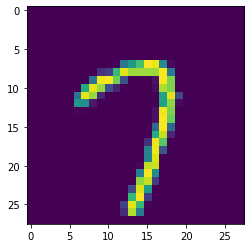

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(df.iloc[28195,1:].values.reshape(28,28))

In [5]:
X=df.drop(['label'],axis=1)
X.shape

(42000, 784)

In [6]:
Y=df['label'].copy()
Y.shape

(42000,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(f"{len(X_train)} {len(Y_train)}")
print(f"{len(X_test)} {len(Y_test)}")

29400 29400
12600 12600


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model=LogisticRegression(multi_class='ovr',max_iter=200)
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

1.0

In [9]:
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=classification_report(Y_test,Y_pred)
print(cm)

# here without reducing the demensions we have got an accuracy over 90 !
# however with the help of pca we can reduce dimention and increase accuracy simultaneously !

0.9608730158730159
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1200
           1       0.98      0.99      0.98      1389
           2       0.95      0.96      0.96      1294
           3       0.96      0.94      0.95      1355
           4       0.96      0.97      0.96      1222
           5       0.96      0.95      0.96      1085
           6       0.97      0.97      0.97      1256
           7       0.97      0.95      0.96      1359
           8       0.95      0.95      0.95      1209
           9       0.94      0.94      0.94      1231

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [12]:
# Affect of each pca effects accuracy as seen below !

# for i in range(1,785):
#     pca=PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
#     model = RandomForestClassifier()
#     model.fit(X_train_trf,Y_train)
#     Y_Pred_trf = model.predict(X_test_trf)
#     print(accuracy_score(Y_test,Y_Pred_trf))

In [13]:
# pca = PCA(n_components=2)
# X=pd.DataFrame(pca.fit_transform(X))
# X.head()

In [14]:
Y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [15]:
# import plotly.express as px
# fig = px.scatter(x=X[0],
#                  y=X[1],
#                  color=Y,
#                  color_discrete_sequence=px.colors.qualitative.G10)
# fig.show()

In [16]:
# pca = PCA(n_components=3)
# X=pd.DataFrame(pca.fit_transform(X))
# X.head()

In [17]:
# import plotly.express as px
# y_train_trf = y_train.astype(str)
# fig = px.scatter_3d(x=X[0], y=X[1], z=X[2],
#               color=Y)
# fig.update_layout(
#     margin=dict(l=20, r=20, t=20, b=20),
#     paper_bgcolor="LightSteelBlue",
# )
# fig.show()

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(X)

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
         3.09891989e-15,  7.74534730e-17, -3.51947236e-17],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
        -4.40633902e-15,  7.14067500e-16, -4.40851318e-16],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
        -4.28660843e-17, -1.30223284e-18,  1.94028037e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
        -3.35663292e-18, -1.24577057e-17,  3.40289347e-18],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
        -3.39102514e-17, -1.01758789e-17,  9.36677142e-19]])

In [19]:
pca.explained_variance_ratio_

array([5.74795336e-02, 4.11169103e-02, 3.78286715e-02, 2.93986212e-02,
       2.55643921e-02, 2.22984433e-02, 1.95255247e-02, 1.77160531e-02,
       1.56266017e-02, 1.42495571e-02, 1.36100884e-02, 1.22254076e-02,
       1.13573634e-02, 1.11309029e-02, 1.05031053e-02, 1.01232575e-02,
       9.51302738e-03, 9.34514435e-03, 9.07258876e-03, 8.85327331e-03,
       8.38907114e-03, 8.12027039e-03, 7.75160752e-03, 7.52311857e-03,
       7.27690355e-03, 6.98755959e-03, 6.90454706e-03, 6.64923638e-03,
       6.30675038e-03, 6.16301289e-03, 6.10922106e-03, 5.97037089e-03,
       5.77283590e-03, 5.73682340e-03, 5.64821911e-03, 5.46321734e-03,
       5.39430432e-03, 5.24361113e-03, 5.04843259e-03, 4.88530211e-03,
       4.82243943e-03, 4.75900896e-03, 4.60007666e-03, 4.57628685e-03,
       4.49583855e-03, 4.46721905e-03, 4.43836948e-03, 4.36836795e-03,
       4.32712937e-03, 4.27026938e-03, 4.19269307e-03, 4.12180430e-03,
       4.02460610e-03, 3.99434033e-03, 3.94891257e-03, 3.90805004e-03,
      

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

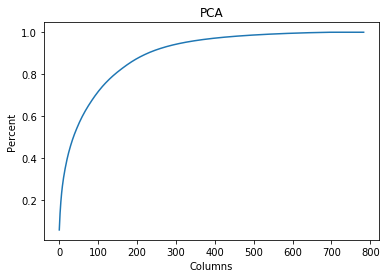

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Columns')
plt.ylabel('Percent')
plt.title('PCA')
plt.show()
# our aim to apply pca and take the most significant data that provides the most information abour our data.
# Generally we will select x number of columnes where y axis = 90%.
# here 250-300 columns cover 90 percent of information of tha data !

In [22]:
X1=df.copy()
X1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X1=df.drop(['label'],axis=1)
X1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Y1=df['label'].copy()
Y1.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [25]:
pca = PCA(n_components=300)
X1=pd.DataFrame(pca.fit_transform(X))
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-5.140478,-5.226445,3.887001,-0.901512,4.929111,2.035413,4.706946,-4.767184,0.230958,-1.460963,...,0.342067,-0.004984,0.001876,0.251703,-0.344613,-0.190437,-0.064801,-0.094794,-0.024852,-0.327883
1,19.292332,6.032996,1.308148,-2.383294,3.095188,-1.791095,-3.772790,0.153865,-4.115192,-4.299357,...,0.195028,-0.176479,0.518992,-0.070549,0.279892,-0.453345,-0.094134,-0.279033,0.043345,-0.033122
2,-7.644503,-1.705813,2.289326,2.241135,5.094426,-4.152058,-1.012004,1.732559,0.436261,-0.073688,...,0.158021,-0.007823,-0.173598,0.776526,0.162164,-0.445744,-0.200204,-0.408259,-0.467212,-0.041845
3,-0.474207,5.836139,2.008617,4.271106,2.377777,2.179913,4.398029,-0.353712,0.992308,5.501253,...,-0.486185,-0.366122,0.938758,-0.486710,-1.592554,0.396434,-0.010828,0.231738,-0.431890,-0.035835
4,26.559574,6.024818,0.933179,-3.012645,9.489179,-2.331196,-6.149597,-1.783637,-4.123302,-5.757362,...,-0.044410,0.158541,0.625662,0.391792,-0.967852,-0.271137,1.086815,0.222168,-1.361378,-0.790441


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

1.0

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Y_pred = model.predict(X_test)
score = accuracy_score(Y_test,Y_pred)
print(score)
cf = classification_report(Y_test,Y_pred)
print(cf)

0.9291269841269841
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1242
           1       0.98      0.97      0.97      1429
           2       0.91      0.93      0.92      1276
           3       0.89      0.92      0.90      1298
           4       0.93      0.92      0.93      1236
           5       0.92      0.89      0.91      1119
           6       0.94      0.97      0.95      1243
           7       0.94      0.93      0.93      1334
           8       0.92      0.89      0.90      1204
           9       0.90      0.89      0.90      1219

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [29]:
# by reducing dimension more than half we are still getting accuracy over 90 !